In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

import plotly.express as px
import plotly.graph_objects as go

from functions import clean_air_data
import pingouin as pg

/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/code/madrid_iot/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [9]:
air_df_2019 = pd.read_csv('/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/Madrid/air/2019calidad-aire-diario.csv',
                           sep=';')
print(air_df_2019.shape)

(1836, 69)


In [17]:
air_df_2019[air_df_2019['ESTACION'] == 57]['MAGNITUD'].unique()

array([ 1,  6,  7,  8, 10, 12])

In [4]:
air_df_2019.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,28,79,4,1,28079004_1_38,2019,1,18.0,V,20.0,...,15.0,V,15.0,V,15.0,V,14.0,V,14.0,V
1,28,79,4,1,28079004_1_38,2019,2,13.0,V,13.0,...,19.0,V,20.0,V,0.0,N,0.0,N,0.0,N
2,28,79,4,1,28079004_1_38,2019,3,18.0,V,18.0,...,6.0,V,7.0,V,6.0,V,4.0,V,4.0,V
3,28,79,4,1,28079004_1_38,2019,4,3.0,V,4.0,...,3.0,V,2.0,V,2.0,V,2.0,V,0.0,N
4,28,79,4,1,28079004_1_38,2019,5,1.0,V,1.0,...,2.0,V,1.0,V,1.0,V,1.0,V,2.0,V


In [29]:
selected_air_station_index = [24,47,50]
selected_air_magnitude_index = [7,9,10,12]
selected_air_df_2019 = air_df_2019[(air_df_2019['ESTACION'].isin(selected_air_station_index)) &
            (air_df_2019['MAGNITUD'].isin(selected_air_magnitude_index))]

In [30]:
selected_air_df_2019.shape

(144, 69)

In [33]:
for i in selected_air_station_index:
    print(selected_air_df_2019[selected_air_df_2019['ESTACION'] == i].shape)

(48, 69)
(48, 69)
(48, 69)


In [34]:
for i in selected_air_magnitude_index:
    print(selected_air_df_2019[selected_air_df_2019['MAGNITUD'] == i].shape)

(36, 69)
(36, 69)
(36, 69)
(36, 69)


In [66]:
D_list= ["D0"+str(i) for i in range(1, 10)]  + ["D1"+str(i) for i in range(0, 10)] + ["D2"+str(i) for i in range(0, 10)] +['D30', "D31"]

In [72]:
new = pd.melt(selected_air_df_2019, id_vars=['ESTACION', 'ANO', 'MES', 'MAGNITUD'], value_vars=D_list)

In [73]:
new

,ESTACION,ANO,MES,MAGNITUD,variable,value
0,24,2019,1,7,D01,33.0
1,24,2019,2,7,D01,1.0
2,24,2019,3,7,D01,8.0
3,24,2019,4,7,D01,4.0
4,24,2019,5,7,D01,2.0
...,...,...,...,...,...,...
4459,50,2019,8,12,D31,67.0
4460,50,2019,9,12,D31,0.0
4461,50,2019,10,12,D31,80.0
4462,50,2019,11,12,D31,0.0


In [95]:
date_condition =new[ (new['MES'] == 2) & (new['variable'].isin(['D29','D30','D31'])) |
    ((new['MES'] == 4) & (new['variable'].isin(['D31'])) )  |
    ((new['MES'] == 6) & (new['variable'].isin(['D31'])) )  |
    ((new['MES'] == 9) & (new['variable'].isin(['D31'])) )  |
    ((new['MES'] == 11) & (new['variable'].isin(['D31'])) ) 
    
    ]  
                                        
                             

In [99]:
to_drop_index = date_condition.index

In [106]:
new_drop_condition = new.drop(to_drop_index)

In [107]:
new_drop_condition.head()

,ESTACION,ANO,MES,MAGNITUD,variable,value
0,24,2019,1,7,D01,33.0
1,24,2019,2,7,D01,1.0
2,24,2019,3,7,D01,8.0
3,24,2019,4,7,D01,4.0
4,24,2019,5,7,D01,2.0


In [109]:
new_drop_condition[(new_drop_condition['MES'] == 1) & (new_drop_condition['MAGNITUD'] == 7)]

,ESTACION,ANO,MES,MAGNITUD,variable,value
0,24,2019,1,7,D01,33.0
48,47,2019,1,7,D01,74.0
96,50,2019,1,7,D01,37.0
144,24,2019,1,7,D02,32.0
192,47,2019,1,7,D02,113.0
...,...,...,...,...,...,...
4224,47,2019,1,7,D30,1.0
4272,50,2019,1,7,D30,21.0
4320,24,2019,1,7,D31,1.0
4368,47,2019,1,7,D31,1.0


<AxesSubplot: xlabel='variable', ylabel='value'>

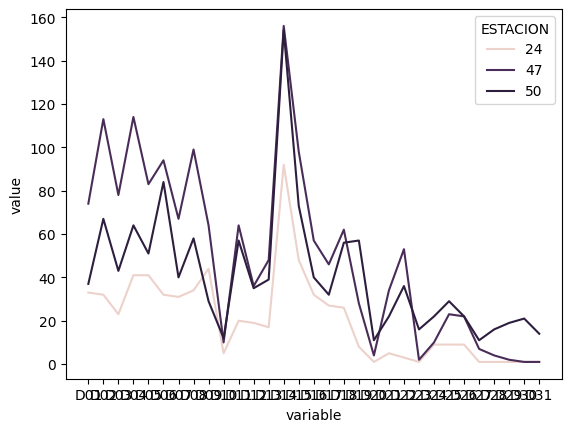

In [111]:
sns.lineplot(data = new_drop_condition[(new_drop_condition['MES'] == 1) & (new_drop_condition['MAGNITUD'] == 7)],
             x= 'variable', y = 'value', hue = 'ESTACION')

In [136]:
air_station_dict = {
    'name' : {24 : 'Plaza de Castilla',
               47: "Méndez Álvaro",
               50: "Casa de Campo"}
    ,
    'station_type': {24: "Suburban",
                     47: "Urban Background",
                     50: "Roadside Traffic"},
    'latitude': {24: 40.4193577,
                47: 40.3980991,
                50: 40.4655841},
    'longitude': {24: -3.7473445,
                47: -3.6868138,
                50: -3.6887449},
    'pollutant': {7: 'NO',
                 9: 'PM2.5',
                 10: 'PM10',
                 12: 'NOx'}
}


air_station_dict2 = {
    'name' : {24 : 'Casa de Campo',
               47: "Méndez Álvaro",
               50: "Plaza Castilla"}
    ,
    'station_type': {24: "Suburban",
                     47: "Urban Background",
                     50: "Roadside Traffic"},
    'latitude': {24: 40.4193577,
                47: 40.3980991,
                50: 40.4655841},
    'longitude': {24: -3.7473445,
                47: -3.6868138,
                50: -3.6887449},
    'pollutant': {7: 'NO',
                 9: 'PM2.5',
                 10: 'PM10',
                 12: 'NOx'}
}



In [137]:
new_drop_condition['pollutant'] = new_drop_condition['MAGNITUD'].apply(lambda x : air_station_dict['pollutant'][x] )
new_drop_condition['station_name'] = new_drop_condition['ESTACION'].apply(lambda x : air_station_dict['name'][x] )
new_drop_condition['station_type'] = new_drop_condition['ESTACION'].apply(lambda x : air_station_dict['station_type'][x] )
new_drop_condition['latitude'] = new_drop_condition['ESTACION'].apply(lambda x : air_station_dict['latitude'][x] )
new_drop_condition['longitude'] = new_drop_condition['ESTACION'].apply(lambda x : air_station_dict['longitude'][x] )

In [138]:
new_drop_condition

,ESTACION,ANO,MES,MAGNITUD,variable,value,pollutant,station_name,station_type,latitude,longitude
0,24,2019,1,7,D01,33.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345
1,24,2019,2,7,D01,1.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345
2,24,2019,3,7,D01,8.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345
3,24,2019,4,7,D01,4.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345
4,24,2019,5,7,D01,2.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345
...,...,...,...,...,...,...,...,...,...,...,...
4456,50,2019,5,12,D31,38.0,NOx,Casa de Campo,Roadside Traffic,40.465584,-3.688745
4458,50,2019,7,12,D31,17.0,NOx,Casa de Campo,Roadside Traffic,40.465584,-3.688745
4459,50,2019,8,12,D31,67.0,NOx,Casa de Campo,Roadside Traffic,40.465584,-3.688745
4461,50,2019,10,12,D31,80.0,NOx,Casa de Campo,Roadside Traffic,40.465584,-3.688745


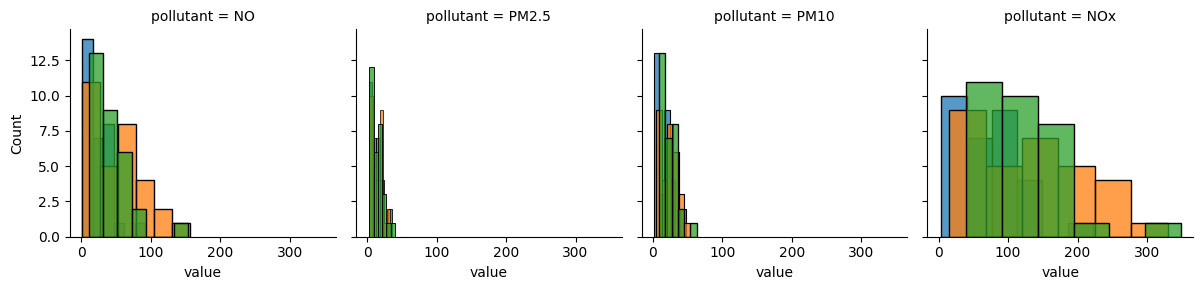

In [159]:
g = sns.FacetGrid(new_drop_condition[(new_drop_condition['MES'] == 1)], col="pollutant", hue = 'station_type')
g.map(sns.histplot,  "value",)

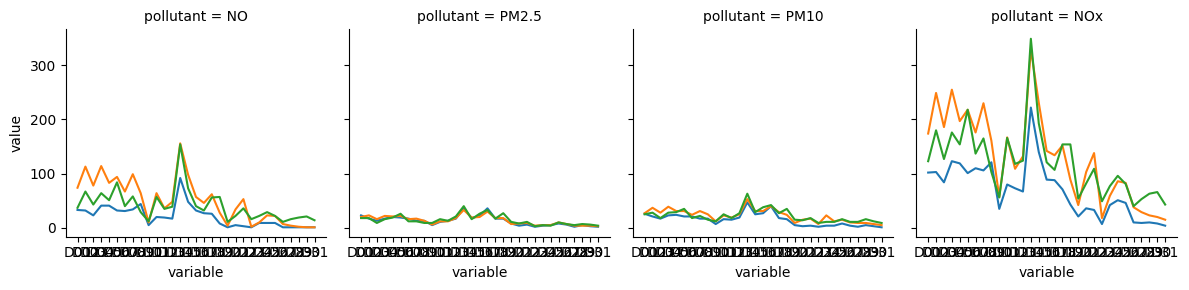

In [160]:
g = sns.FacetGrid(new_drop_condition[(new_drop_condition['MES'] == 1)], col="pollutant", hue = 'station_type')
g.map(sns.lineplot, 'variable',  "value",)

<AxesSubplot: xlabel='variable', ylabel='value'>

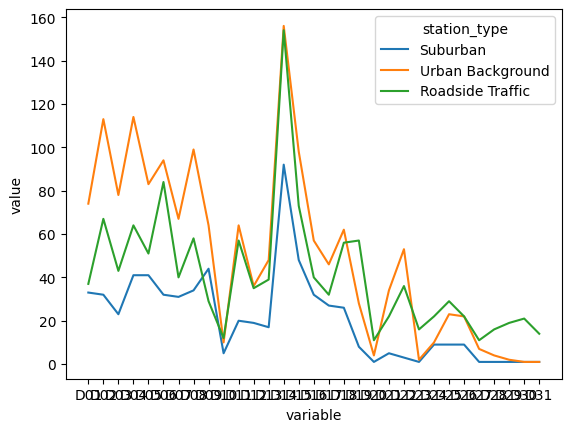

In [139]:
sns.lineplot(data = new_drop_condition[(new_drop_condition['MES'] == 1) & (new_drop_condition['MAGNITUD'] == 7)],
             x= 'variable', y = 'value', hue = 'station_type')

In [5]:
from functions import clean_air_data

In [6]:
filename = "/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/Madrid/air/2019calidad-aire-diario.csv"
df = clean_air_data(filename)

Im crazy


In [7]:
df.shape

(4380, 11)

/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/code/aire-data.ipynb
/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/code/functions.py

In [127]:
file = "/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/Madrid/air/2019calidad-aire-diario.csv"

In [4]:
path2020 = "/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/Madrid/air/2020calidad-aire-diario.csv"
df2020 = clean_air_data(filename=path2020)

Im crazy


In [9]:
print(df2020.shape)
print(df.shape)

(4380, 11)
(4380, 11)


In [7]:
def edit_month_to_two_digit(input):
    if len(str(input)) < 2:
        new_input = str(0) + str(input)
    else:
        new_input = input
    
    return new_input

In [8]:
df['MES'] = df.apply(lambda x: edit_month_to_two_digit(x['MES']), axis = 1)

In [9]:
df.head()

,ESTACION,ANO,MES,MAGNITUD,variable,value,pollutant,station_name,station_type,latitude,longitude
0,24,2019,01,7,D01,33.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345
1,24,2019,02,7,D01,1.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345
2,24,2019,03,7,D01,8.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345
3,24,2019,04,7,D01,4.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345
4,24,2019,05,7,D01,2.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345


In [11]:
df.apply(lambda x  : x['variable'][1:] +"-" + str(x['MES']) + "-" + str(x['ANO']), axis = 1)

0       01-01-2019
1       01-02-2019
2       01-03-2019
3       01-04-2019
4       01-05-2019
           ...    
4456    31-05-2019
4458    31-07-2019
4459    31-08-2019
4461    31-10-2019
4463    31-12-2019
Length: 4380, dtype: object

In [12]:
df['datestamp'] = pd.to_datetime(df.apply(lambda x  : x['variable'][1:] +"-" + str(x['MES']) + "-" + str(x['ANO']), axis = 1),
               format = '%d-%m-%Y')

In [13]:
df.head()

,ESTACION,ANO,MES,MAGNITUD,variable,value,pollutant,station_name,station_type,latitude,longitude,datestamp
0,24,2019,01,7,D01,33.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345,2019-01-01
1,24,2019,02,7,D01,1.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345,2019-02-01
2,24,2019,03,7,D01,8.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345,2019-03-01
3,24,2019,04,7,D01,4.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345,2019-04-01
4,24,2019,05,7,D01,2.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345,2019-05-01


<AxesSubplot: xlabel='datestamp', ylabel='value'>

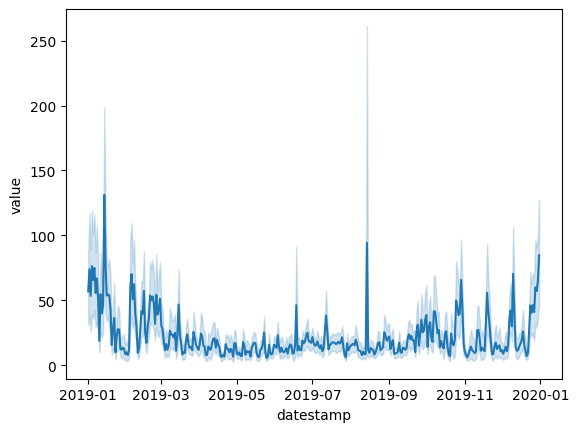

In [14]:
sns.lineplot(data = df, x= 'datestamp', y = 'value')

In [16]:
df

,ESTACION,ANO,MES,MAGNITUD,variable,value,pollutant,station_name,station_type,latitude,longitude,datestamp
0,24,2019,01,7,D01,33.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345,2019-01-01
1,24,2019,02,7,D01,1.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345,2019-02-01
2,24,2019,03,7,D01,8.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345,2019-03-01
3,24,2019,04,7,D01,4.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345,2019-04-01
4,24,2019,05,7,D01,2.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345,2019-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...
4456,50,2019,05,12,D31,38.0,NOx,Casa de Campo,Roadside Traffic,40.465584,-3.688745,2019-05-31
4458,50,2019,07,12,D31,17.0,NOx,Casa de Campo,Roadside Traffic,40.465584,-3.688745,2019-07-31
4459,50,2019,08,12,D31,67.0,NOx,Casa de Campo,Roadside Traffic,40.465584,-3.688745,2019-08-31
4461,50,2019,10,12,D31,80.0,NOx,Casa de Campo,Roadside Traffic,40.465584,-3.688745,2019-10-31


In [20]:
fig = px.scatter_mapbox(df,
                     lat='latitude',lon='longitude',
                     hover_name="station_name",
                     zoom=10, 
                     height=800,
                     width=800,
                     color = 'station_type')
fig.update_layout(mapbox_style="open-street-map")
fig.update_traces(marker={'size': 15})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


---

In [24]:
df.to_csv('2019-air-clean-df.csv')

---

# PUT IT ALL TOGTHER AND RUN

In [2]:
import os
os.chdir("/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/Madrid/air")
PATH = "/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/Madrid/air"

In [3]:
frame = []
for file in os.listdir():
    if file.endswith("aire-diario.csv"):
        FILE_PATH_NAME = PATH + "/" + file
        year = file[:4]
        print(FILE_PATH_NAME)
        df = clean_air_data(FILE_PATH_NAME)
        
        CLEAN_SAVE_PATH = PATH
        CLEAN_SAVE_NAME = year + "clean-air-df.csv"
        
        frame.append(df)
        
        df.to_csv(CLEAN_SAVE_NAME)

combined_df = pd.concat(frame)
combined_df.to_csv('combined-clean-air-df.csv')
        

/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/Madrid/air/2020calidad-aire-diario.csv
Cleaning AIR data...
Dropping: 0 rows
/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/Madrid/air/2022calidad-aire-diario.csv
Cleaning AIR data...
Dropping: 3 rows
/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/Madrid/air/2019calidad-aire-diario.csv
Cleaning AIR data...
Dropping: 0 rows


In [28]:
pg.print_table(pg.anova(combined_df, dv='value', between='station_name', detailed=False), tablefmt= "latex")


ANOVA SUMMARY

\begin{tabular}{lrrrrr}
\hline
 Source       &   ddof1 &   ddof2 &       F &   p-unc &   np2 \\
\hline
 station\_name &       2 &   12033 & 128.665 &   0.000 & 0.021 \\
\hline
\end{tabular}



/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/code/madrid_iot/lib/python3.10/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()


In [30]:
pg.anova(combined_df, dv='value', between=['station_name', 'variable'], detailed=False)

,Source,SS,DF,MS,F,p-unc,np2
0,station_name,2.019825e+05,2.0,100991.247258,128.447696,6.417544e-56,0.021057
1,variable,4.280351e+04,30.0,1426.783537,1.814683,4.168706e-03,0.004538
2,station_name * variable,1.198569e+04,60.0,199.761560,0.254071,1.000000e+00,0.001275
3,Residual,9.390114e+06,11943.0,786.244129,NaN,NaN,NaN


In [88]:
pg.pairwise_tests(combined_df[combined_df['pollutant'] == 'NOx'], dv='value', within=[ 'station_type', 'ANO'],
                  parametric = True, return_desc=  True)

TypeError: 'NoneType' object is not callable

In [89]:
pd.options.display.float_format = '{:.2f}'.format

In [91]:
result = pg.pairwise_tests(combined_df[combined_df['pollutant'] == 'NOx'], dv='value', between=[ 'station_type', 'ANO'],
                  parametric = False, return_desc=  True)
result

/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/code/madrid_iot/lib/python3.10/site-packages/pingouin/pairwise.py:381: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stats.loc[:, "A"] = A
/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/code/madrid_iot/lib/python3.10/site-packages/pingouin/pairwise.py:382: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stats.loc[:, "B"] = B
/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project

,Contrast,station_type,A,B,mean(A),std(A),mean(B),std(B),Paired,Parametric,U-val,alternative,p-unc,hedges
0,station_type,-,Roadside Traffic,Suburban,52.38,38.64,25.68,26.51,False,False,789219.00,two-sided,0.00,0.81
1,station_type,-,Roadside Traffic,Urban Background,52.38,38.64,48.56,54.79,False,False,599552.00,two-sided,0.00,0.08
2,station_type,-,Suburban,Urban Background,25.68,26.51,48.56,54.79,False,False,287669.50,two-sided,0.00,-0.53
3,ANO,-,2019,2020,50.94,53.64,39.11,39.22,False,False,717463.50,two-sided,0.00,0.25
4,ANO,-,2019,2022,50.94,53.64,34.68,28.29,False,False,537194.50,two-sided,0.00,0.36
5,ANO,-,2020,2022,39.11,39.22,34.68,28.29,False,False,434429.00,two-sided,0.24,0.13
6,station_type * ANO,Roadside Traffic,2019,2020,63.21,43.07,48.17,40.04,False,False,86069.50,two-sided,0.00,0.36
7,station_type * ANO,Roadside Traffic,2019,2022,63.21,43.07,43.52,24.76,False,False,65461.50,two-sided,0.00,0.54
8,station_type * ANO,Roadside Traffic,2020,2022,48.17,40.04,43.52,24.76,False,False,46533.50,two-sided,0.15,0.14
9,station_type * ANO,Suburban,2019,2020,30.19,29.56,25.38,28.39,False,False,76786.50,two-sided,0.00,0.17


In [92]:
result = pg.pairwise_tests(combined_df[combined_df['pollutant'] == 'NOx'], dv='value', between=[ 'station_type', 'ANO'],
                  parametric = False, return_desc=  True)
result[result['p-unc'] < 0.01]

/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/code/madrid_iot/lib/python3.10/site-packages/pingouin/pairwise.py:381: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stats.loc[:, "A"] = A
/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/code/madrid_iot/lib/python3.10/site-packages/pingouin/pairwise.py:382: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stats.loc[:, "B"] = B
/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project

,Contrast,station_type,A,B,mean(A),std(A),mean(B),std(B),Paired,Parametric,U-val,alternative,p-unc,hedges
0,station_type,-,Roadside Traffic,Suburban,52.38,38.64,25.68,26.51,False,False,789219.00,two-sided,0.00,0.81
1,station_type,-,Roadside Traffic,Urban Background,52.38,38.64,48.56,54.79,False,False,599552.00,two-sided,0.00,0.08
2,station_type,-,Suburban,Urban Background,25.68,26.51,48.56,54.79,False,False,287669.50,two-sided,0.00,-0.53
3,ANO,-,2019,2020,50.94,53.64,39.11,39.22,False,False,717463.50,two-sided,0.00,0.25
4,ANO,-,2019,2022,50.94,53.64,34.68,28.29,False,False,537194.50,two-sided,0.00,0.36
6,station_type * ANO,Roadside Traffic,2019,2020,63.21,43.07,48.17,40.04,False,False,86069.50,two-sided,0.00,0.36
7,station_type * ANO,Roadside Traffic,2019,2022,63.21,43.07,43.52,24.76,False,False,65461.50,two-sided,0.00,0.54
9,station_type * ANO,Suburban,2019,2020,30.19,29.56,25.38,28.39,False,False,76786.50,two-sided,0.00,0.17
10,station_type * ANO,Suburban,2019,2022,30.19,29.56,20.06,16.81,False,False,58824.00,two-sided,0.00,0.41
12,station_type * ANO,Urban Background,2019,2020,59.42,72.57,43.78,43.84,False,False,80414.50,two-sided,0.00,0.26


In [23]:
combined_df

,ESTACION,ANO,MES,MAGNITUD,variable,value,pollutant,station_name,station_type,latitude,longitude,datestamp
0,24,2020,01,7,D01,52.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345,2020-01-01
1,24,2020,02,7,D01,1.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345,2020-02-01
2,24,2020,03,7,D01,1.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345,2020-03-01
3,24,2020,04,7,D01,1.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345,2020-04-01
4,24,2020,05,7,D01,1.0,NO,Plaza de Castilla,Suburban,40.419358,-3.747345,2020-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...
4456,50,2019,05,12,D31,38.0,NOx,Casa de Campo,Roadside Traffic,40.465584,-3.688745,2019-05-31
4458,50,2019,07,12,D31,17.0,NOx,Casa de Campo,Roadside Traffic,40.465584,-3.688745,2019-07-31
4459,50,2019,08,12,D31,67.0,NOx,Casa de Campo,Roadside Traffic,40.465584,-3.688745,2019-08-31
4461,50,2019,10,12,D31,80.0,NOx,Casa de Campo,Roadside Traffic,40.465584,-3.688745,2019-10-31


In [19]:
combined_df.groupby('ANO')

In [21]:
combined_df.groupby('ANO').mean()

/var/folders/tl/rdcj6pp130g_pdpr6thc58qr0000gn/T/ipykernel_13258/1119200750.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combined_df.groupby('ANO').mean()


,ESTACION,MAGNITUD,value,latitude,longitude
ANO,,,,,
2019,40.333333,9.5,22.305936,40.42768,-3.707634
2020,40.333333,9.5,18.145205,40.42768,-3.707634
2022,40.333333,9.5,18.173382,40.42768,-3.707634


In [38]:
combined_df.groupby(['pollutant', 'station_type', 'ANO' ])['value'].describe().T

pollutant                  NO                                                  \
station_type Roadside Traffic                            Suburban               
ANO                      2019        2020        2022        2019        2020   
count              365.000000  365.000000  273.000000  365.000000  365.000000   
mean                17.235616   13.183562    7.886447    6.328767    5.838356   
std                 18.011728   15.940713    9.031294   10.488422   11.041314   
min                  1.000000    1.000000    1.000000    1.000000    1.000000   
25%                  6.000000    3.000000    2.000000    1.000000    1.000000   
50%                 12.000000    6.000000    5.000000    2.000000    2.000000   
75%                 22.000000   16.000000   10.000000    6.000000    5.000000   
max                154.000000  110.000000   63.000000   92.000000   91.000000   

pollutant                                                          \
station_type             Urban Background                           
ANO                 2022             2019        2020        2022   
count         273.000000       365.000000  365.000000  273.000000   
mean            3.025641        15.539726   11.213699    9.388278   
std             4.425370        25.368638   19.351387   13.939317   
min             0.000000         0.000000    1.000000    0.000000   
25%             1.000000         2.000000    1.000000    2.000000   
50%             1.000000         4.000000    2.000000    4.000000   
75%             2.000000        17.000000   11.000000    7.000000   
max            29.000000       192.000000  150.000000   81.000000   

pollutant                 NOx  ...             PM10            PM2.5  \
station_type Roadside Traffic  ... Urban Background Roadside Traffic   
ANO                      2019  ...             2022             2019   
count              365.000000  ...       273.000000       365.000000   
mean                63.205479  ...        21.827839         8.934247   
std                 43.065488  ...        32.169525         5.228415   
min                 11.000000  ...         0.000000         2.000000   
25%                 35.000000  ...         9.000000         5.000000   
50%                 52.000000  ...        15.000000         8.000000   
75%                 77.000000  ...        25.000000        11.000000   
max                349.000000  ...       443.000000        40.000000   

pollutant                                                                 \
station_type                            Suburban                           
ANO                 2020        2022        2019        2020        2022   
count         365.000000  273.000000  365.000000  365.000000  273.000000   
mean            8.295890   11.091575    8.849315    8.846575    9.344322   
std             4.471535   10.490666    5.535776    5.336328    6.835148   
min             2.000000    0.000000    2.000000    2.000000    0.000000   
25%             5.000000    5.000000    5.000000    5.000000    5.000000   
50%             7.000000    8.000000    8.000000    8.000000    8.000000   
75%            11.000000   14.000000   12.000000   11.000000   11.000000   
max            26.000000   76.000000   36.000000   38.000000   83.000000   

pollutant                                              
station_type Urban Background                          
ANO                      2019        2020        2022  
count              365.000000  365.000000  273.000000  
mean                 9.706849    7.945205    9.923077  
std                  5.815296    5.063038    9.159009  
min                  0.000000    0.000000    0.000000  
25%                  5.000000    4.000000    5.000000  
50%                  9.000000    7.000000    7.000000  
75%                 13.000000   10.000000   11.000000  
max                 33.000000   34.000000   78.000000  

[8 rows x 36 columns]

In [39]:
combined_df.groupby(['pollutant', 'station_type', 'ANO' ])['value'].describe().T.to_csv('sth.csv')

In [40]:
combined_df.groupby(['pollutant', 'station_type', 'ANO' ])['value'].describe().T.to_latex()

/var/folders/tl/rdcj6pp130g_pdpr6thc58qr0000gn/T/ipykernel_13258/494951792.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  combined_df.groupby(['pollutant', 'station_type', 'ANO' ])['value'].describe().T.to_latex()


'\\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}\n\\toprule\npollutant & \\multicolumn{9}{l}{NO} & \\multicolumn{9}{l}{NOx} & \\multicolumn{9}{l}{PM10} & \\multicolumn{9}{l}{PM2.5} \\\\\nstation\\_type & \\multicolumn{3}{l}{Roadside Traffic} & \\multicolumn{3}{l}{Suburban} & \\multicolumn{3}{l}{Urban Background} & \\multicolumn{3}{l}{Roadside Traffic} & \\multicolumn{3}{l}{Suburban} & \\multicolumn{3}{l}{Urban Background} & \\multicolumn{3}{l}{Roadside Traffic} & \\multicolumn{3}{l}{Suburban} & \\multicolumn{3}{l}{Urban Background} & \\multicolumn{3}{l}{Roadside Traffic} & \\multicolumn{3}{l}{Suburban} & \\multicolumn{3}{l}{Urban Background} \\\\\nANO &             2019 &        2020 &        2022 &        2019 &        2020 &        2022 &             2019 &        2020 &        2022 &             2019 &        2020 &        2022 &        2019 &        2020 &        2022 &             2019 &        2020 &        2022 &             2019 &        2020 &        2022 &        2019

<AxesSubplot: xlabel='datestamp', ylabel='value'>

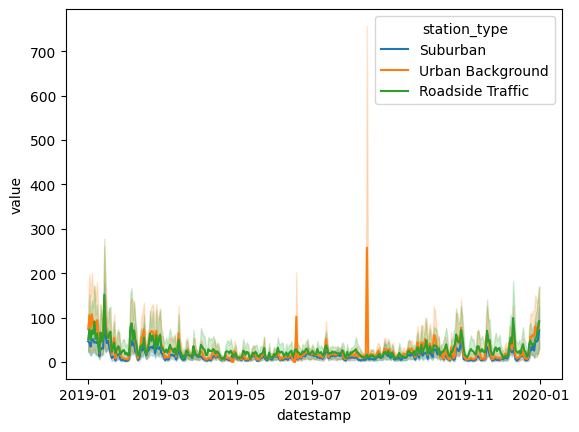

In [42]:
sns.lineplot(data= combined_df[combined_df['ANO'] == 2019], x = 'datestamp', y = 'value', hue = 'station_type')